<a href="https://colab.research.google.com/github/dashabelousova23/DS_intro_my_1/blob/main/Homework6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MSE: 4.079044038327469
MAE: 1.635833370523045
R²: 0.9549883829769742


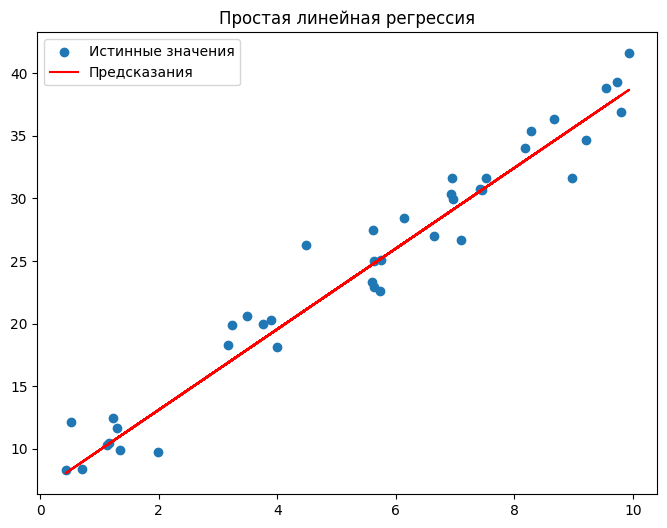

In [29]:
##Из классной.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# данные
X = np.random.rand(200, 1) * 10                 # 200 случайных чисел от 0 до 10
y = 3.2 * X + 7 + np.random.randn(200, 1) * 2   # y = 3.2x + 7 + шум

# разделение
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # random_state=42 - для воспроизводимости результатов
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# метрики
print("MSE:", mean_squared_error(y_test, y_pred))   # Средняя квадратичная ошибка
print("MAE:", mean_absolute_error(y_test, y_pred))  # Средняя абсолютная ошибка
print("R²:", r2_score(y_test, y_pred))              # Коэффициент детерминации

# график
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, label='Истинные значения')
plt.plot(X_test, y_pred, color='r', label='Предсказания')
plt.legend()
plt.title("Простая линейная регрессия")
plt.show()

In [30]:
import pandas as pd

data = {
    'hours': [1,2,3,4,5,6,7,8,9,10],
    'attendance': [60,65,70,75,80,85,90,95,97,100],
    'previous_grade': [50,55,60,65,70,75,80,85,88,90],
    'final_score': [52,56,61,66,71,77,82,87,90,94],
    'motivation' : [3,4,5,5,6,7,8,8,9,10]
}
df = pd.DataFrame(data)

X = df[['hours', 'attendance', 'previous_grade', 'motivation']]
y = df['final_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))
print('R^2 стала больше примерно на 0.00114. Раньше было: R²: 0.9945383512544804. Теперь: R²: 0.9956842713083015. ')

MAE: 0.7228867623604458
R²: 0.9956842713083015
R^2 стала больше примерно на 0.00114. Раньше было: R²: 0.9945383512544804. Теперь: R²: 0.9956842713083015. 


In [32]:
##Задача 2.

##Возьми модель из раздела MNIST.

##Попробуй изменить архитектуру (например, добавить ещё один Dense-слой или увеличить число нейронов).

##Поэкспериментируй с batch_size, epochs и optimizer.

##Добейся точности выше 0.98+.

##Построй графики accuracy и loss для анализа.

##Построй графики accuracy и loss для анализа.

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# нормализация
X_train = X_train.reshape((60000, 28*28)).astype('float32') / 255
X_test = X_test.reshape((10000, 28*28)).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер обучающей выборки: (60000, 784)
Размер тестовой выборки: (10000, 784)


In [33]:
model = keras.Sequential([
    layers.Dense(140, activation='relu', input_shape=(28*28,)),
    layers.Dense(60, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=25, batch_size=125, validation_split=0.2)

NameError: name 'keras' is not defined

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Точность на тесте: {test_acc:.3f}")

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

AttributeError: 'LinearRegression' object has no attribute 'evaluate'

In [10]:
indices_mis = np.where(y_pred_classes != y_true)[0]
print("Всего ошибочных:", len(indices_mis))

# если ошибок много — выберем случайные 10 (или меньше)
k = min(10, len(indices_mis))
sample_indices = np.random.choice(indices_mis, k, replace=False)
show_images_grid(X_test, y_true, y_pred_classes, indices=sample_indices, n_cols=5, title_prefix="Ошибочные примеры")

NameError: name 'y_pred_classes' is not defined

In [11]:
indices_corr = np.where(y_pred_classes == y_true)[0]
print("Всего правильных:", len(indices_corr))

k = min(10, len(indices_corr))
sample_indices = np.random.choice(indices_corr, k, replace=False)
show_images_grid(X_test, y_true, y_pred_classes, indices=sample_indices, n_cols=5, title_prefix="Правильные примеры")

NameError: name 'y_pred_classes' is not defined

In [12]:
examples = []
for cls in range(10):
    mis_cls_idx = np.where((y_true == cls) & (y_pred_classes != cls))[0]
    corr_cls_idx = np.where((y_true == cls) & (y_pred_classes == cls))[0]
    ex_mis = mis_cls_idx[0] if len(mis_cls_idx)>0 else None
    ex_corr = corr_cls_idx[0] if len(corr_cls_idx)>0 else None
    examples.append((cls, ex_corr, ex_mis))

fig, axs = plt.subplots(10, 2, figsize=(6, 30))
for i, (cls, ex_corr, ex_mis) in enumerate(examples):
    if ex_corr is not None:
        axs[i,0].imshow(X_test[ex_corr].reshape(28,28), cmap='gray')
        axs[i,0].set_title(f"True {cls}, Pred {y_pred_classes[ex_corr]}")
    else:
        axs[i,0].text(0.5,0.5,"No correct example", ha='center')

    if ex_mis is not None:
        axs[i,1].imshow(X_test[ex_mis].reshape(28,28), cmap='gray')
        axs[i,1].set_title(f"True {cls}, Pred {y_pred_classes[ex_mis]}")
    else:
        axs[i,1].text(0.5,0.5,"No misclassified example", ha='center')

    axs[i,0].axis('off'); axs[i,1].axis('off')
plt.suptitle("По строкам: правильный / ошибочный пример для каждой цифры", fontsize=14)
plt.tight_layout(rect=[0,0,1,0.97])
plt.show()

NameError: name 'y_true' is not defined